##### Libraries used in the data set

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import datetime
from datetime import timedelta
import pytz
import calendar
import functools 
%matplotlib inline
plt.style.use("seaborn-whitegrid")
from matplotlib import pyplot as plt
from matplotlib import style
import time
from os import system, name
from IPython.display import clear_output
%matplotlib inline

###### User Defined function

In [3]:
def month_conversion(x):
    return calendar.month_abbr[x]

In [4]:
def changing_time_zone(x):
    eastern = pytz.timezone('America/Los_Angeles')
    eastern_date =x.astimezone(eastern)
    return eastern_date

In [5]:
def check_all_style_on_graph(n=3):
    #if not imported then this function will import these libraries
    from matplotlib import pyplot as plt
    from matplotlib import style
    import time
    from os import system, name
    from IPython.display import clear_output
    %matplotlib inline
    
    for i in plt.style.available:
        #Setting style for the graph
        print("\nThe style name of the graph is :- ",i)
        plt.style.use(i)
        #plt.style.use("dark_background")
        plt.figure(figsize = (12,7))
        plt.plot(data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().kWhDelivered,'go--', linewidth=2, markersize=12,color="yellow",label='Average_energy_delivered')
        plt.plot(data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().month_of_connections.apply(month_conversion),[10.0,10.0,10.0,10.0,10.0,10.0,10.0], linewidth=2, markersize=12,color="red",label='Energy requested by user')
        plt.title("Average Energy delivered per Month",fontsize=20)
        plt.xlabel("Months",fontsize=20)
        plt.legend(loc='center',fontsize=15)
        plt.ylabel("Average Energy delivered(KWh)",fontsize=20)
        #Displaying the Graph
        #generate_figs(fig)
        #plt.style.use("fivethirtyeight")
        #graph
        #plt.plot()
        plt.show()
        # can plot specifically, after just showing the defaults:
        
        #Taking n seconds pause
        time.sleep(n)
        
        #clearing the screen
        clear_output()
        
#check_all_style_on_graph()

Reading the clean Session data set into python

In [6]:
data1=pd.read_csv("C:/Users/admin/Desktop/rohan/projects/EV/data_set/EVC_charging_sessions/clean_data/session_data_clean.csv")
data2=pd.read_csv("C:/Users/admin/Desktop/rohan/projects/EV/data_set/EVC_charging_sessions/clean_data/session_data_clean_partially.csv")

checking the type of data present in all the columns 

In [7]:
data1.dtypes

Unnamed: 0                int64
_id                      object
clusterID                 int64
connectionTime           object
disconnectTime           object
doneChargingTime         object
kWhDelivered            float64
sessionID                object
siteID                    int64
spaceID                  object
stationID                object
timezone                 object
userID                  float64
WhPerMile               float64
kWhRequested            float64
milesRequested          float64
minutesAvailable        float64
modifiedAt               object
paymentRequired            bool
requestedDeparture       object
Connecting_week_days     object
Total charging time       int64
Time took to charge       int64
dtype: object

In [72]:
print(len(data1['sessionID'].unique()))
print(len(data1['_id'].unique()))
len(data1)

3870
3870


3870

In [71]:
data1['_id'].unique()

array(['5cb28090f9af8b41d62ede72', '5cb28090f9af8b41d62ede74',
       '5cb28090f9af8b41d62ede75', ..., '5d8ea9a3f9af8b2ead96d714',
       '5d8ea9a3f9af8b2ead96d715', '5d8ea9a3f9af8b2ead96d716'],
      dtype=object)

In [76]:
abs(data1['Total charging time']-data1['Time took to charge']).mean()

13826.13488372093

converting the time zone from utc to 

converting the date time columns to their respective format data1

In [9]:
data1['connectionTime']=pd.to_datetime(data1['connectionTime'])
data1['disconnectTime']=pd.to_datetime(data1['disconnectTime'])
data1['doneChargingTime']=pd.to_datetime(data1['doneChargingTime'])
data1['requestedDeparture']=pd.to_datetime(data1['requestedDeparture'])

changing the time zone of data time columns

In [10]:
data1['connectionTime']=data1['connectionTime'].apply(changing_time_zone)
data1['disconnectTime']=data1['disconnectTime'].apply(changing_time_zone)
data1['doneChargingTime']=data1['doneChargingTime'].apply(changing_time_zone)
data1['requestedDeparture']=data1['requestedDeparture'].apply(changing_time_zone)

converting the date time columns to their respective format data2

In [11]:
data2['connectionTime']=pd.to_datetime(data2['connectionTime'])
data2['disconnectTime']=pd.to_datetime(data2['disconnectTime'])
data2['doneChargingTime']=pd.to_datetime(data2['doneChargingTime'])
data2['requestedDeparture']=pd.to_datetime(data2['requestedDeparture'])

changing the time zone of data time columns

In [12]:
data2['connectionTime']=data2['connectionTime'].apply(changing_time_zone)
data2['disconnectTime']=data2['disconnectTime'].apply(changing_time_zone)
data2['doneChargingTime']=data2['doneChargingTime'].apply(changing_time_zone)
#data2['requestedDeparture']=data2['requestedDeparture'].apply(chenging_time_zone)

Dropping the data of user inputs form the semi-cleaned data (data2) as in sample of data we have 13% of NA 's ,so we are dropping this column.we are going to use this data set(data2) only for finding stats about sessions. 

In [13]:
data2=data2.drop(['userID', 'WhPerMile', 'kWhRequested','milesRequested', 'minutesAvailable', 'modifiedAt', 'paymentRequired','requestedDeparture'], axis = 1)

extracting years and months

In [14]:
data1["month_of_connections"]=data1['connectionTime'].dt.month
data1["year_of_connection"]=data1['connectionTime'].dt.year

In [15]:
data2["month_of_connections"]=data2['connectionTime'].dt.month
data2["year_of_connection"]=data2['connectionTime'].dt.year

In [16]:
print("The data 1 has :",data1.shape[0],"rows and ",data1.shape[1],"columns")
print("The data 2 has :",data2.shape[0],"rows and ",data2.shape[1],"columns")

The data 1 has : 3870 rows and  25 columns
The data 2 has : 4489 rows and  17 columns


checking the id columns

checking the number of unique values present in all ids columns

In [17]:
print("\nIn data set 1")
print("\nThe number of unique sessions :- ",len(data1['sessionID'].unique()))
print("\nThe number of unique sites :- ",len(data1['siteID'].unique()))
print("\nThe number of unique garage :- ",len(data1['clusterID'].unique()))
print("\nThe number of unique EVSE as :- ",len(data1['stationID'].unique()))
print("\nThe number of unique parking space id :- ",len(data1['spaceID'].unique()))
print("\nThe number of unique users present in the data set :- ",len(data1['userID'].unique()))


In data set 1

The number of unique sessions :-  3870

The number of unique sites :-  1

The number of unique garage :-  1

The number of unique EVSE as :-  48

The number of unique parking space id :-  48

The number of unique users present in the data set :-  1


In [18]:
print("\nIn data set 2")
print("\nThe number of unique sessions :- ",len(data2['sessionID'].unique()))
print("\nThe number of unique sites :- ",len(data2['siteID'].unique()))
print("\nThe number of unique garage :- ",len(data2['clusterID'].unique()))
print("\nThe number of unique EVSE as :- ",len(data2['stationID'].unique()))
print("\nThe number of unique parking space id :- ",len(data2['spaceID'].unique()))


In data set 2

The number of unique sessions :-  4489

The number of unique sites :-  1

The number of unique garage :-  1

The number of unique EVSE as :-  52

The number of unique parking space id :-  52


So the basic scenario of our data is , in this data, we have one particular site, in which we have one EVC garage, in that EVC garage, we have 52 EVSE 's present in that garage with 52 parking slots. only one user is using EVSE through many sessions from date '2019-03-29 06:44:57' to '2019-09-12 08:55:34'.so in each session, the disconnecting has been recorded and how much amount of energy delivered is also recorded for a particular session. For each session the user is providing some input,whPerMile of his vehicle, Energy requested by the user(Kwh), length of the session estimated by the user(minutes) and User estimated departure time was given by the user.

## user dynamic visulation data

In [19]:
data2['connecting_date']=data2['connectionTime'].dt.date.astype('str')
data2['connecting_time']=data2['connectionTime'].dt.time

In [20]:
#getting connecting hour ,minute and second.
data2['connecting_hour']=data2['connectionTime'].dt.hour
data2['connecting_minute']=data2['connectionTime'].dt.minute
data2['connecting_second']=data2['connectionTime'].dt.second

#getting disconnecting hour ,minute and second
data2['disconnecting_hour']=data2['disconnectTime'].dt.hour
data2['disconnecting_minute']=data2['disconnectTime'].dt.minute
data2['disconnecting_second']=data2['disconnectTime'].dt.second

#getting done charging hour,minute and second
data2['doneCharging_hour']=data2['doneChargingTime'].dt.hour
data2['doneChargingT_minute']=data2['doneChargingTime'].dt.minute
data2['doneChargingT_second']=data2['doneChargingTime'].dt.second

In [21]:
#getting connecting day,month and year.
data2['connecting_day']=data2['connectionTime'].dt.day
data2['connecting_month']=data2['connectionTime'].dt.month
data2['connecting_year']=data2['connectionTime'].dt.year

In [22]:
#data2
pd.set_option('display.max_columns', 500)
data2[data2['connecting_date']=="2019-03-29"]

,Unnamed: 0,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,Connecting_week_days,Total charging time,Time took to charge,month_of_connections,year_of_connection,connecting_date,connecting_time,connecting_hour,connecting_minute,connecting_second,disconnecting_hour,disconnecting_minute,disconnecting_second,doneCharging_hour,doneChargingT_minute,doneChargingT_second,connecting_day,connecting_month,connecting_year
1,1,5cb28090f9af8b41d62ede73,39,2019-03-29 00:17:34-07:00,2019-03-29 01:14:11-07:00,2019-03-29 00:48:10-07:00,0.844,2_39_124_22_2019-03-29 00:17:34.437344,2,CA-312,2-39-124-22,America/Los_Angeles,Fri,3397,1836,3,2019,2019-03-29,00:17:34,0,17,34,1,14,11,0,48,10,29,3,2019
2,2,5cb28090f9af8b41d62ede74,39,2019-03-29 01:28:42-07:00,2019-03-29 02:36:13-07:00,2019-03-29 02:36:04-07:00,3.723,2_39_139_28_2019-03-29 01:28:41.779204,2,CA-303,2-39-139-28,America/Los_Angeles,Fri,4051,4042,3,2019,2019-03-29,01:28:42,1,28,42,2,36,13,2,36,4,29,3,2019
3,3,5cb28090f9af8b41d62ede75,39,2019-03-29 02:39:36-07:00,2019-03-29 13:49:08-07:00,2019-03-29 04:26:08-07:00,11.454,2_39_123_23_2019-03-29 02:39:36.360277,2,CA-313,2-39-123-23,America/Los_Angeles,Fri,40172,6392,3,2019,2019-03-29,02:39:36,2,39,36,13,49,8,4,26,8,29,3,2019
4,4,5cb3d172f9af8b4551261e28,39,2019-03-29 13:34:00-07:00,2019-03-29 15:06:24-07:00,2019-03-29 14:51:33-07:00,3.784,2_39_89_25_2019-03-29 13:34:00.027531,2,CA-315,2-39-89-25,America/Los_Angeles,Fri,5544,4653,3,2019,2019-03-29,13:34:00,13,34,0,15,6,24,14,51,33,29,3,2019
5,5,5cb3d172f9af8b4551261e29,39,2019-03-29 13:41:31-07:00,2019-03-29 19:08:36-07:00,2019-03-29 17:15:41-07:00,17.826,2_39_88_24_2019-03-29 13:41:31.037770,2,CA-314,2-39-88-24,America/Los_Angeles,Fri,66775,73550,3,2019,2019-03-29,13:41:31,13,41,31,19,8,36,17,15,41,29,3,2019
6,6,5cb3d172f9af8b4551261e2a,39,2019-03-29 14:58:03-07:00,2019-03-29 15:33:12-07:00,2019-03-29 15:33:07-07:00,3.955,2_39_90_26_2019-03-29 14:58:03.335682,2,CA-316,2-39-90-26,America/Los_Angeles,Fri,2109,2104,3,2019,2019-03-29,14:58:03,14,58,3,15,33,12,15,33,7,29,3,2019
7,7,5cb3d172f9af8b4551261e2b,39,2019-03-29 15:26:25-07:00,2019-03-30 00:37:00-07:00,2019-03-29 19:01:30-07:00,12.088,2_39_139_28_2019-03-29 15:26:25.309466,2,CA-303,2-39-139-28,America/Los_Angeles,Fri,53365,73495,3,2019,2019-03-29,15:26:25,15,26,25,0,37,0,19,1,30,29,3,2019
8,8,5cb3d172f9af8b4551261e2c,39,2019-03-29 15:26:30-07:00,2019-03-30 02:20:27-07:00,2019-03-29 17:15:08-07:00,10.495,2_39_79_380_2019-03-29 15:26:29.796244,2,CA-489,2-39-79-380,America/Los_Angeles,Fri,47163,79882,3,2019,2019-03-29,15:26:30,15,26,30,2,20,27,17,15,8,29,3,2019
9,9,5cb3d172f9af8b4551261e2d,39,2019-03-29 15:31:51-07:00,2019-03-29 16:15:31-07:00,2019-03-29 16:16:22-07:00,4.745,2_39_95_27_2019-03-29 15:31:50.751725,2,CA-319,2-39-95-27,America/Los_Angeles,Fri,2620,2671,3,2019,2019-03-29,15:31:51,15,31,51,16,15,31,16,16,22,29,3,2019
10,10,5cb3d172f9af8b4551261e2e,39,2019-03-29 15:43:23-07:00,2019-03-30 00:09:14-07:00,2019-03-29 18:24:05-07:00,9.401,2_39_131_30_2019-03-29 15:43:22.522886,2,CA-305,2-39-131-30,America/Los_Angeles,Fri,56049,76758,3,2019,2019-03-29,15:43:23,15,43,23,0,9,14,18,24,5,29,3,2019


In [23]:
date="2019-03-29"
def creating_data(date):
    data=data2[data2['connecting_date']==date]
    #some variable used
    charging_status=[]
    connection_status=[]
    time=[]
    total_energy=0
    date=[]
    session_id=[]
    

In [24]:
data2['speed_transmittion(KW/sec)']=data2['kWhDelivered']/data2['Time took to charge']

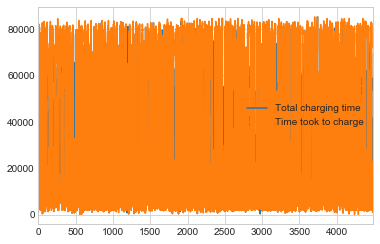

In [82]:
from matplotlib import pyplot as plt
data2[["Total charging time","Time took to charge"]].plot()

In [26]:
x=data2[data2["connecting_date"]=="2019-03-29"]
print(x.iloc[0]['connecting_hour'])
print(x.iloc[0]['connecting_minute'])
print(x.iloc[0]['connecting_second'])
print(x.iloc[0]["kWhDelivered"])
print(x.iloc[0]['speed_transmittion(KW/sec)'])
print(x.iloc[0]['doneChargingT_minute'])
print(x.iloc[0]['doneCharging_hour'])
print(x.iloc[0]['doneChargingT_second'])
print(x.iloc[0]['disconnecting_hour'])
print(x.iloc[0]['doneChargingT_minute'])
print(x.iloc[0]['doneChargingT_second'])

0
17
34
0.8440000000000001
0.0004596949891067539
48
0
10
1
48
10


In [51]:
import time
#time.sleep(n)
#clear_output()
#data=data2[data2['connecting_date']==date]
date1="2019-03-29"
data=data2[data2['connecting_date']==date1]
data['connecting_second']=data['connecting_second'].astype('int')
data['connecting_minute']=data['connecting_minute'].astype('int')
data['connecting_hour']=data['connecting_hour'].astype('int')
data['']
hour=0
minute=0
second=0
string_time="00:00:00"
string_hour="00"
string_minute="00"
string_second="00"
date=[]
charging_status=[]
connection_status=[]
time1=[]
session_id=[]
energy_consumed=[]
energy=0
row_count=0
time_seconds=0
time_took_second=0
#calculating hour
for hours in range(0,24):
    #checking for the single digit number in hours 
    if(hour <= 9):
        string_hour="0"+str(hour)
    else:
        string_hour=str(hour)
    #increasing the minutes
    minute=0
    
    
    #calculating minutes
    for minutes in range(0,60):
        #checking for the single digit number in minutes
        if(minute <= 9):
            string_minute="0"+str(minute)
        else:
            string_minute=str(minute)
        second=0
        
        #calculating seconds
        for seconds in range(0,60):
            if(second <= 9):
                string_second="0"+str(second)
                print(string_hour+":"+string_minute+":"+string_second)
                string_time=string_hour+":"+string_minute+":"+string_second
                #date.append(date1)
                #time.append(string_hour+":"+string_minute+":"+string_second)
                #time.sleep(1)
                clear_output()
            else:
                string_second=str(second)
                print(string_hour+":"+string_minute+":"+string_second)
                string_time=string_hour+":"+string_minute+":"+string_second
                #time.sleep(1)
                clear_output()
            second+=1
            
            
            if((data.iloc[row_count]['connecting_second']==second) & (data.iloc[row_count]['connecting_minute']==minute) & (data.iloc[row_count]['connecting_hour']==hour)):
                date.append(date1)
                session_id.append(data.iloc[row_count]['sessionID'])
                connection_status.append("Connected")
                if(data.iloc[row_count]['Time took to charge'] < time_took_second):
                    charging_status.append("Charging")
                    energy=energy+data.iloc[row_count]['speed_transmittion(KW/sec)']
                    energy_consumed.append(energy)
                    time1.append(string_time)
                    time_took_second+=1
                    if(data.iloc[row_count]['Time took to charge']>=time_took_second):
                        time_took
                else:
                    charging_status.append("Not Charging")
                    time1.append(string_time)
                    energy=0
                    energy_consumed.append(energy)
                if(data.iloc[row_count]['Total charging time'] >= time_seconds):
                    time_seconds=0
                    row_count+=1
                else:
                    time_seconds+=1
            else:
                date.append(date1)
                session_id.append("")
                connection_status.append("Disconnected")
                charging_status.append('Not charging')
                time1.append(string_time)
                energy=0
                energy_consumed.append(energy)
        
            
            
            
            
        minute+=1
    hour+=1
    if(hour == 24):
        hour=0

In [58]:
data2

,Unnamed: 0,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,Connecting_week_days,Total charging time,Time took to charge,month_of_connections,year_of_connection,connecting_date,connecting_time,connecting_hour,connecting_minute,connecting_second,disconnecting_hour,disconnecting_minute,disconnecting_second,doneCharging_hour,doneChargingT_minute,doneChargingT_second,connecting_day,connecting_month,connecting_year,speed_transmittion(KW/sec)
0,0,5cb28090f9af8b41d62ede72,39,2019-03-28 23:44:57-07:00,2019-03-29 00:53:31-07:00,2019-03-29 00:53:27-07:00,3.977000,2_39_79_377_2019-03-28 23:44:57.290195,2,CA-325,2-39-79-377,America/Los_Angeles,Fri,4114,4110,3,2019,2019-03-28,23:44:57,23,44,57,0,53,31,0,53,27,28,3,2019,0.000968
1,1,5cb28090f9af8b41d62ede73,39,2019-03-29 00:17:34-07:00,2019-03-29 01:14:11-07:00,2019-03-29 00:48:10-07:00,0.844000,2_39_124_22_2019-03-29 00:17:34.437344,2,CA-312,2-39-124-22,America/Los_Angeles,Fri,3397,1836,3,2019,2019-03-29,00:17:34,0,17,34,1,14,11,0,48,10,29,3,2019,0.000460
2,2,5cb28090f9af8b41d62ede74,39,2019-03-29 01:28:42-07:00,2019-03-29 02:36:13-07:00,2019-03-29 02:36:04-07:00,3.723000,2_39_139_28_2019-03-29 01:28:41.779204,2,CA-303,2-39-139-28,America/Los_Angeles,Fri,4051,4042,3,2019,2019-03-29,01:28:42,1,28,42,2,36,13,2,36,4,29,3,2019,0.000921
3,3,5cb28090f9af8b41d62ede75,39,2019-03-29 02:39:36-07:00,2019-03-29 13:49:08-07:00,2019-03-29 04:26:08-07:00,11.454000,2_39_123_23_2019-03-29 02:39:36.360277,2,CA-313,2-39-123-23,America/Los_Angeles,Fri,40172,6392,3,2019,2019-03-29,02:39:36,2,39,36,13,49,8,4,26,8,29,3,2019,0.001792
4,4,5cb3d172f9af8b4551261e28,39,2019-03-29 13:34:00-07:00,2019-03-29 15:06:24-07:00,2019-03-29 14:51:33-07:00,3.784000,2_39_89_25_2019-03-29 13:34:00.027531,2,CA-315,2-39-89-25,America/Los_Angeles,Fri,5544,4653,3,2019,2019-03-29,13:34:00,13,34,0,15,6,24,14,51,33,29,3,2019,0.000813
5,5,5cb3d172f9af8b4551261e29,39,2019-03-29 13:41:31-07:00,2019-03-29 19:08:36-07:00,2019-03-29 17:15:41-07:00,17.826000,2_39_88_24_2019-03-29 13:41:31.037770,2,CA-314,2-39-88-24,America/Los_Angeles,Fri,66775,73550,3,2019,2019-03-29,13:41:31,13,41,31,19,8,36,17,15,41,29,3,2019,0.000242
6,6,5cb3d172f9af8b4551261e2a,39,2019-03-29 14:58:03-07:00,2019-03-29 15:33:12-07:00,2019-03-29 15:33:07-07:00,3.955000,2_39_90_26_2019-03-29 14:58:03.335682,2,CA-316,2-39-90-26,America/Los_Angeles,Fri,2109,2104,3,2019,2019-03-29,14:58:03,14,58,3,15,33,12,15,33,7,29,3,2019,0.001880
7,7,5cb3d172f9af8b4551261e2b,39,2019-03-29 15:26:25-07:00,2019-03-30 00:37:00-07:00,2019-03-29 19:01:30-07:00,12.088000,2_39_139_28_2019-03-29 15:26:25.309466,2,CA-303,2-39-139-28,America/Los_Angeles,Fri,53365,73495,3,2019,2019-03-29,15:26:25,15,26,25,0,37,0,19,1,30,29,3,2019,0.000164
8,8,5cb3d172f9af8b4551261e2c,39,2019-03-29 15:26:30-07:00,2019-03-30 02:20:27-07:00,2019-03-29 17:15:08-07:00,10.495000,2_39_79_380_2019-03-29 15:26:29.796244,2,CA-489,2-39-79-380,America/Los_Angeles,Fri,47163,79882,3,2019,2019-03-29,15:26:30,15,26,30,2,20,27,17,15,8,29,3,2019,0.000131
9,9,5cb3d172f9af8b4551261e2d,39,2019-03-29 15:31:51-07:00,2019-03-29 16:15:31-07:00,2019-03-29 16:16:22-07:00,4.745000,2_39_95_27_2019-03-29 15:31:50.751725,2,CA-319,2-39-95-27,America/Los_Angeles,Fri,2620,2671,3,2019,2019-03-29,15:31:51,15,31,51,16,15,31,16,16,22,29,3,2019,0.001776


In [52]:
print(len(date))
print(len(charging_status))
print(len(connection_status))
print(len(time1))
print(len(session_id))
print(len(energy_consumed))



kkk=pd.DataFrame({"Date":date,"Time":time1,"connection_status":connection_status,"charging_status":charging_status,"Energy_consumed":energy_consumed,"session_id":session_id})

86400
86400
86400
86400
86400
86400


In [73]:
kkk


,Date,Time,connection_status,charging_status,Energy_consumed,session_id
0,2019-03-29,00:00:00,Disconnected,Not charging,0,
1,2019-03-29,00:00:01,Disconnected,Not charging,0,
2,2019-03-29,00:00:02,Disconnected,Not charging,0,
3,2019-03-29,00:00:03,Disconnected,Not charging,0,
4,2019-03-29,00:00:04,Disconnected,Not charging,0,
5,2019-03-29,00:00:05,Disconnected,Not charging,0,
6,2019-03-29,00:00:06,Disconnected,Not charging,0,
7,2019-03-29,00:00:07,Disconnected,Not charging,0,
8,2019-03-29,00:00:08,Disconnected,Not charging,0,
9,2019-03-29,00:00:09,Disconnected,Not charging,0,


In [57]:
kkk['connection_status'].unique()
data.iloc[0]['connecting_second']==34

True

In [49]:
type(data2[data2['connecting_date']==date1]['connecting_minute'][1])

numpy.int64

In [50]:
type(2)

int

In [ ]:
data2[data2['connecting_date']=="2019-03-29"]

In [ ]:
data2.columns

In [ ]:
pd.set_option('display.max_columns', 500)
data1['kWhRequested'].unique()

In [ ]:
if((hour==0) & (minute==0) & (second==0)):
            if(len(data[(data["connecting_hour"]== hour) & (data["connecting_minute"]==minute) & (data["connecting_second"]==second)])==0):
                date.append(date1)
                time.append(string_hour+":"+string_minute+":"+string_second)
                charging_status.append("Not_charging")
                connection_status.append("disconnected")
                energy_transfered.append(0)
                session_id.append(None)
            else:
                

In [ ]:
len(data2['sessionID'].unique())
len(data2)

The basic inference of the data by above data describtion.

Number of sessions done on each month

In [ ]:
plt.style.use("dark_background")
plt.figure(figsize = (12,7))
plt.bar(data2.groupby(['month_of_connections'])['sessionID'].size().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['sessionID'].size().reset_index().sessionID,color="cyan",width=0.4,label="Number of sessions")
plt.title("Number Sessions done by user Month",fontsize=28)
plt.xlabel("Months",fontsize=22)
plt.legend(loc='upper right',fontsize=15)
plt.ylim(0,1100)
plt.ylabel("Number of sessions",fontsize=22)

In [ ]:
#plt.style.use("fivethirtyeight")
#plt.style.use("seaborn-dark-palette")
#plt.style.use("seaborn-dark")
plt.style.use("dark_background")
plt.figure(figsize = (12,7))
plt.plot(data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().kWhDelivered,'go--', linewidth=2, markersize=12,color="yellow",label='Average_energy_delivered')
plt.plot(data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().month_of_connections.apply(month_conversion),[10.0,10.0,10.0,10.0,10.0,10.0,10.0], linewidth=2, markersize=12,color="red",label='Energy requested by user')
plt.title("Average Energy delivered per Month",fontsize=28)
plt.xlabel("Months",fontsize=22)
plt.legend(loc='center',fontsize=15)
plt.ylim(8,10.5)
plt.ylabel("Average Energy delivered(KWh)",fontsize=22)

In [ ]:
fig = plt.figure(figsize = (12,7))
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_ylim(8,10.5)
par1.set_ylim(7,10)

host.set_xlabel("Months",fontsize=22)
host.set_ylabel("Average Energy delivered(KWh)",fontsize=22)
par1.set_ylabel("Average Time took to Charge(Hr)",fontsize=22)
host.set_title("Average Time took to deliver and Average Energy delivered(Kwh) by Months",fontsize=22)

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
#color3 = plt.cm.viridis(.9)

p1, = host.plot(data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().kWhDelivered,'go--', linewidth=2, markersize=12,color="yellow",label='Average_energy_delivered')
p2, = par1.plot(data2.groupby(['month_of_connections'])['Time took to charge'].mean().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['Time took to charge'].mean().reset_index()['Time took to charge']/3600,'go--', linewidth=2, markersize=12,color="white", label="Average Time_took_to_charge")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

In [ ]:
fig = plt.figure(figsize = (12,7))
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_ylim(8,10.5)
par1.set_ylim(7,10)

host.set_xlabel("Months",fontsize=22)
host.set_ylabel("Average Energy delivered(KWh)",fontsize=22)
par1.set_ylabel("Average Time took to Charge(Hr)",fontsize=22)
host.set_title("Average Time took to deliver and Average Energy delivered(Kwh) by Months",fontsize=22)

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
#color3 = plt.cm.viridis(.9)

p1, = host.plot(data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['kWhDelivered'].mean().reset_index().kWhDelivered,'go--', linewidth=2, markersize=12,color="yellow",label='Average_energy_delivered')
p2, = par1.plot(data2.groupby(['month_of_connections'])['Time took to charge'].mean().reset_index().month_of_connections.apply(month_conversion),data2.groupby(['month_of_connections'])['Time took to charge'].mean().reset_index()['Time took to charge']/3600,'go--', linewidth=2, markersize=12,color="white", label="Average Time_took_to_charge")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

In [ ]:
data2.groupby(['month_of_connections'])[''].mean().reset_index().month_of_connections.apply(month_conversion)

In [ ]:
data2['delay(minutes)']=abs(data2['Total charging time']-data2['Time took to charge'])/60
data2['Total charging time']=data2['Total charging time']/60
data2['Time took to charge']=data2['Total charging time']/60

In [ ]:
data2.groupby(['spaceID','stationID']).size().reset_index().sort_values(0,ascending=False)

In [ ]:
#the time took is in second
data1['Speed_of_energy_transmittion(Kwh/seconds)']=data1['kWhDelivered']/data1['Time took to charge']

In [ ]:
data1['Speed_of_energy_transmittion(Kwh/seconds)']

In [ ]:
data1.groupby(['stationID'])['Speed_of_energy_transmittion(Kwh/seconds)'].mean().reset_index().sort_values(by="Speed_of_energy_transmittion(Kwh/seconds)",ascending=False).head(3)

In [ ]:
#plt.figure(figsize = (12,8))

data1.groupby(['month_of_connections'])['Total charging time','Time took to charge'].mean().plot(kind ='bar',figsize =(12,8),cmap="summer")
plt.title("Delay in unplugging EVSE",weight='bold',fontsize=20)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Time in seconds",fontsize=18)
plt.show()

In [ ]:
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['No Of Sessions'].mean().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['No Of Sessions'].mean().reset_index()['No Of Sessions'],hue = consumption_data.groupby(['Year','Month'])['No Of Sessions'].mean().reset_index()['Year'].astype(int),palette="Accent")
plt.title("Average Number of sessions by Months and year",fontsize=15)

In [ ]:
data2